# PROJECT : PREDICTING FLIGHT TIME PERFORMANCES ACROSS THE U.S.

## Project Overview: 

The purpose of this Project is to analyze flight time performances across The United States of America. Also, to predict Airline Delays and their Reasons. 

### About the Data

This Project's Dataset was taken from The United States Department of Transportation's [official-website](https://www.transportation.gov/), under the section Bureau of Transportation Statistics. Click [HERE](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)to go directly to the website's page where the dataset can be downloaded.

## Opening and Reading into the Dataset.

In this first step we will open and read into the dataset called ** "flight_data.csv"**. We will do this by using a built in python library known as ** pandas**. This enables us to call a method **pd.read_csv()** which enables us to read into the dataset. To learn more about this we can look at the [pandas-documentation](http://pandas.pydata.org/pandas-docs/stable/). 

In [2]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import numpy as np
# Display the max rows and columns in a dataframe
pd.set_option("display.max_rows", 999)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth',100)
from IPython.display import display 
%matplotlib inline 

# Reading into the CSV file
data = "flight_data.csv"
flight_data = pd.read_csv(data)

# Reading into the CSV file
data = "flight_data.csv"
flight_data = pd.read_csv(data, low_memory = False)

print("Data loaded Successfully")
print("The data has {} samples with {} features each".format(*flight_data.shape))

/Users/Deepak/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data loaded Successfully
The data has 445827 samples with 110 features each


From the Printed Lines above the data has been readed into successfully. We can begin to look at what the data looks like. We can do this by printing the first few rows of our dataset by calling the **.head()** method, Like below:

In [2]:
flight_data.head()

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2016        1      1           6          3  2016-01-06            AA   
1  2016        1      1           7          4  2016-01-07            AA   
2  2016        1      1           8          5  2016-01-08            AA   
3  2016        1      1           9          6  2016-01-09            AA   
4  2016        1      1          10          7  2016-01-10            AA   

   AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
0      19805      AA  N4YBAA      ...               NaN          NaN   
1      19805      AA  N434AA      ...               NaN          NaN   
2      19805      AA  N541AA      ...               NaN          NaN   
3      19805      AA  N489AA      ...               NaN          NaN   
4      19805      AA  N439AA      ...               NaN          NaN   

   Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0            NaN               NaN          NaN            NaN   
1            NaN               NaN          NaN            NaN   
2            NaN               NaN          NaN            NaN   
3            NaN               NaN          NaN            NaN   
4            NaN               NaN          NaN            NaN   

  Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0              NaN            NaN         NaN           NaN  
1              NaN            NaN         NaN           NaN  
2              NaN            NaN         NaN           NaN  
3              NaN            NaN         NaN           NaN  
4              NaN            NaN         NaN           NaN  

[5 rows x 110 columns]

## Data Exploration 

In the earlier section we read into the dataset. In this section we will dive deeper which will help us learn certain characteristics or aspects about the data. 

Here is the Agenda for this section:
- Data Vizualization (A Map showing all the major airports across the Country)
- Identifying Missing Values within the Dataset
- Data Exploration Continued (Analyzing certain aspects about the Data)
- Finding a Problem to solve

#### Graphically Vizualizating Cities with Airports across the US

In this section, we will plot a map showing all the cities with airports across the country of the United States of America. We will plot the map using tools such BaseMap and Geopy.
(Note: Cities are marked with red dots!)

Could not locate Mission/McAllen/Edinburg, TX
Could not locate Scranton/Wilkes-Barre, PA
Could not locate Newport News/Williamsburg, VA
Could not locate Pago Pago, TT
Could not locate Saginaw/Bay City/Midland, MI
Could not locate Sun Valley/Hailey/Ketchum, ID
Could not locate Iron Mountain/Kingsfd, MI
Could not locate Guam, TT
Could not locate North Bend/Coos Bay, OR
Could not locate Harlingen/San Benito, TX
Could not locate Hattiesburg/Laurel, MS
Could not locate Jacksonville/Camp Lejeune, NC
Could not locate New Bern/Morehead/Beaufort, NC


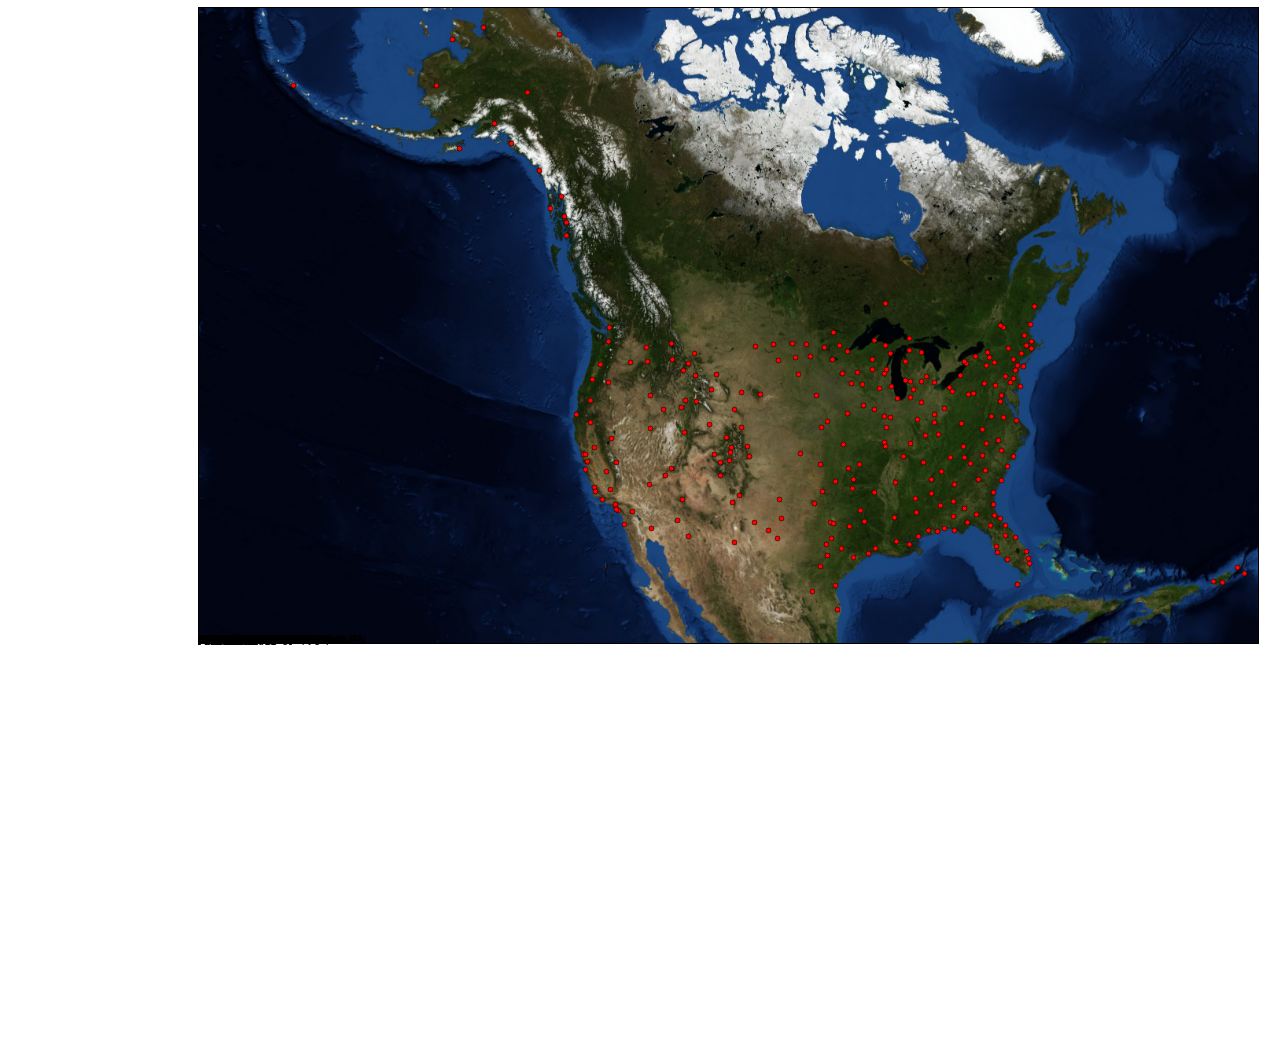

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math

city_list = list(flight_data["OriginCityName"].unique())
cities = city_list
scale = 1

map = Basemap(width=10000000,height=6000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
plt.figure(figsize=(19,20))
map.bluemarble()


# Get the location of each city and plot it
geolocator = Nominatim()
for city in cities:
    loc = geolocator.geocode(city)
    if not loc:
        print("Could not locate {}".format(city))
        continue
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=5)
    plt.annotate(city, xy = (x,y), xytext=(-20,20))
plt.show()

Above, we see that map successfully plots the cities of the United States of America. We also see the printed names of the cities that could not be located on the map.


#### Identifying Missing Values within the dataset 

Before we move any further it is important to see if there is data missing from the dataset. We will identify to see if there are any missing values within the dataset. 

In [4]:
missing_data = flight_data.isnull().sum()
print(missing_data)

Year                       0
Quarter                    0
Month                      0
DayofMonth                 0
DayOfWeek                  0
FlightDate                 0
UniqueCarrier              0
AirlineID                  0
Carrier                    0
TailNum                 4244
FlightNum                  0
OriginAirportID            0
OriginAirportSeqID         0
OriginCityMarketID         0
Origin                     0
OriginCityName             0
OriginState                0
OriginStateFips            0
OriginStateName            0
OriginWac                  0
DestAirportID              0
DestAirportSeqID           0
DestCityMarketID           0
Dest                       0
DestCityName               0
DestState                  0
DestStateFips              0
DestStateName              0
DestWac                    0
CRSDepTime                 0
                       ...  
Div2WheelsOn          445821
Div2TotalGTime        445821
Div2LongestGTime      445821
Div2WheelsOff 

### Data Exploration Continued

This is the second part of Data Exploration. Here, we will use more code or implement fuctions to do certain tasks or calculations. But before we do so, we are going to make a copy of the dataset so that we dont tamper with the original data. 

In [3]:
flight_data_explored = flight_data.copy()
print("Flight data has been copied successfully!")

Flight data has been copied successfully!


###### Analyzing Departure Delayed Flights greater than one hundred minutes 

Here we will analyze the flights scheduled for departure with a delay greater than one hundred minutes.

In [49]:
delayed_flights_over_100mins = flight_data_explored[flight_data_explored["DepDelayMinutes"] >= 100]

delayed_flights_100_filtered = delayed_flights_over_100mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

# We only print 5 just to see a sample 
print(display(delayed_flights_100_filtered.head()))

UniqueCarrier  OriginAirportID  AirlineID         OriginCityName Origin  \
4              AA            11298      19805  Dallas/Fort Worth, TX    DFW   
35             AA            11433      19805            Detroit, MI    DTW   
78             AA            14747      19805            Seattle, WA    SEA   
97             AA            12478      19805           New York, NY    JFK   
157            AA            14107      19805            Phoenix, AZ    PHX   

              DestCityName Dest  
4              Detroit, MI  DTW  
35   Dallas/Fort Worth, TX  DFW  
78            New York, NY  JFK  
97             Seattle, WA  SEA  
157  Dallas/Fort Worth, TX  DFW

None


###### Analyzing Arrival Delayed Flights

Here, Similarly how we analyzed departing flights delayed over a 100 minutes. We will do the same for arrival flights

In [50]:
arrival_flights_over_100mins = flight_data_explored[flight_data_explored["ArrDelayMinutes"] >= 100]

arrival_flights_100_filtered = arrival_flights_over_100mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

# We only print 5 just to see a sample 
print(display(arrival_flights_100_filtered.head()))

UniqueCarrier  OriginAirportID  AirlineID         OriginCityName Origin  \
4              AA            11298      19805  Dallas/Fort Worth, TX    DFW   
35             AA            11433      19805            Detroit, MI    DTW   
78             AA            14747      19805            Seattle, WA    SEA   
157            AA            14107      19805            Phoenix, AZ    PHX   
168            AA            14107      19805            Phoenix, AZ    PHX   

              DestCityName Dest  
4              Detroit, MI  DTW  
35   Dallas/Fort Worth, TX  DFW  
78            New York, NY  JFK  
157  Dallas/Fort Worth, TX  DFW  
168  Dallas/Fort Worth, TX  DFW

None


###### Departure Delays for more than 15 minutes

Here we will analyze the flights delayed for departure greater than 15 minutes 

In [51]:
departure_delay_15mins = flight_data_explored[flight_data_explored["DepDel15"] == 1]
departure_delay_15mins_filtered = departure_delay_15mins[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]
print (display(departure_delay_15mins_filtered.head()))

UniqueCarrier  OriginAirportID  AirlineID         OriginCityName Origin  \
4             AA            11298      19805  Dallas/Fort Worth, TX    DFW   
15            AA            11298      19805  Dallas/Fort Worth, TX    DFW   
24            AA            11298      19805  Dallas/Fort Worth, TX    DFW   
26            AA            11433      19805            Detroit, MI    DTW   
35            AA            11433      19805            Detroit, MI    DTW   

             DestCityName Dest  
4             Detroit, MI  DTW  
15            Detroit, MI  DTW  
24            Detroit, MI  DTW  
26  Dallas/Fort Worth, TX  DFW  
35  Dallas/Fort Worth, TX  DFW

None


###### Analyzing Flights that Departed Earlier than Scheduled time


Here, we are going to analyze the flights that departed earlier than their expected time

In [52]:
departure_earlier_than_schedule = flight_data_explored[flight_data_explored["DepDelay"] < 0]
departure_earlier_filtered = departure_earlier_than_schedule[["UniqueCarrier", "OriginAirportID", "AirlineID",
                                                            "OriginCityName", "Origin", "DestCityName", "Dest"]]

print(display(departure_earlier_filtered.head()))

UniqueCarrier  OriginAirportID  AirlineID         OriginCityName Origin  \
0            AA            11298      19805  Dallas/Fort Worth, TX    DFW   
1            AA            11298      19805  Dallas/Fort Worth, TX    DFW   
2            AA            11298      19805  Dallas/Fort Worth, TX    DFW   
6            AA            11298      19805  Dallas/Fort Worth, TX    DFW   
7            AA            11298      19805  Dallas/Fort Worth, TX    DFW   

  DestCityName Dest  
0  Detroit, MI  DTW  
1  Detroit, MI  DTW  
2  Detroit, MI  DTW  
6  Detroit, MI  DTW  
7  Detroit, MI  DTW

None


###### Analyzing Arrival Delays and reasons

In [53]:
mask = (flight_data_explored["ArrDelay"] > 0) & (flight_data_explored["WeatherDelay"]>0)
arrival_delayed_weather_filter=flight_data_explored.ix[mask, ["UniqueCarrier","AirlineID", "ArrDelay", "WeatherDelay", ]]
print(display(arrival_delayed_weather_filter.head()))

UniqueCarrier  AirlineID  ArrDelay  WeatherDelay
15             AA      19805      21.0          21.0
35             AA      19805     116.0          12.0
104            AA      19805      66.0          61.0
132            AA      19805      81.0          26.0
143            AA      19805      73.0          11.0

None


#### Finding the Net Value of Departure and Arrival Delays

In this section we will sum both Departure Delay and ArrivalDelay to find the total delayed time. The results turn out to be either positive or negative 

In [54]:
flight_data_explored["sumDepArr"] = flight_data_explored["DepDelay"] + flight_data_explored["ArrDelay"]
sum_arrival_delay_filter = flight_data_explored[["UniqueCarrier", "AirlineID", "DepDelay", "ArrDelay", "sumDepArr"]]
print(display(sum_arrival_delay_filter.head()))   

UniqueCarrier  AirlineID  DepDelay  ArrDelay  sumDepArr
0            AA      19805      -3.0      -6.0       -9.0
1            AA      19805      -4.0     -12.0      -16.0
2            AA      19805      -5.0       7.0        2.0
3            AA      19805       2.0      -5.0       -3.0
4            AA      19805     100.0     113.0      213.0

None


###### Adding up Time to Taxi In and Taxi Out

Here, we are going to add up on how long an aircraft takes to Taxi In into the airport after landing and how long it takes to taxi out onto the runway for departure

In [55]:
flight_data_explored["sumTaxiIn/TaxiOut"] = flight_data_explored["TaxiIn"] + flight_data_explored["TaxiOut"]
sum_taxi_filter = flight_data_explored[["UniqueCarrier", "AirlineID", "Origin", "OriginCityName", "Dest", "DestCityName",
                               "TaxiIn", "TaxiOut", "sumTaxiIn/TaxiOut"]]
print(display(sum_taxi_filter.head()))   

UniqueCarrier  AirlineID Origin         OriginCityName Dest DestCityName  \
0            AA      19805    DFW  Dallas/Fort Worth, TX  DTW  Detroit, MI   
1            AA      19805    DFW  Dallas/Fort Worth, TX  DTW  Detroit, MI   
2            AA      19805    DFW  Dallas/Fort Worth, TX  DTW  Detroit, MI   
3            AA      19805    DFW  Dallas/Fort Worth, TX  DTW  Detroit, MI   
4            AA      19805    DFW  Dallas/Fort Worth, TX  DTW  Detroit, MI   

   TaxiIn  TaxiOut  sumTaxiIn/TaxiOut  
0     8.0     15.0               23.0  
1    10.0     14.0               24.0  
2    14.0     21.0               35.0  
3     9.0     13.0               22.0  
4    14.0     20.0               34.0

None


In [6]:
flight_data_explored.head(50)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0   2016        1      1           6          3  2016-01-06            AA   
1   2016        1      1           7          4  2016-01-07            AA   
2   2016        1      1           8          5  2016-01-08            AA   
3   2016        1      1           9          6  2016-01-09            AA   
4   2016        1      1          10          7  2016-01-10            AA   
5   2016        1      1          11          1  2016-01-11            AA   
6   2016        1      1          12          2  2016-01-12            AA   
7   2016        1      1          13          3  2016-01-13            AA   
8   2016        1      1          14          4  2016-01-14            AA   
9   2016        1      1          15          5  2016-01-15            AA   
10  2016        1      1          16          6  2016-01-16            AA   
11  2016        1      1          17          7  2016-01-17            AA   
12  2016        1      1          18          1  2016-01-18            AA   
13  2016        1      1          19          2  2016-01-19            AA   
14  2016        1      1          20          3  2016-01-20            AA   
15  2016        1      1          21          4  2016-01-21            AA   
16  2016        1      1          22          5  2016-01-22            AA   
17  2016        1      1          23          6  2016-01-23            AA   
18  2016        1      1          24          7  2016-01-24            AA   
19  2016        1      1          25          1  2016-01-25            AA   
20  2016        1      1          26          2  2016-01-26            AA   
21  2016        1      1          27          3  2016-01-27            AA   
22  2016        1      1          28          4  2016-01-28            AA   
23  2016        1      1          29          5  2016-01-29            AA   
24  2016        1      1          30          6  2016-01-30            AA   
25  2016        1      1          31          7  2016-01-31            AA   
26  2016        1      1           1          5  2016-01-01            AA   
27  2016        1      1           2          6  2016-01-02            AA   
28  2016        1      1           3          7  2016-01-03            AA   
29  2016        1      1           4          1  2016-01-04            AA   
30  2016        1      1           5          2  2016-01-05            AA   
31  2016        1      1           6          3  2016-01-06            AA   
32  2016        1      1           7          4  2016-01-07            AA   
33  2016        1      1           8          5  2016-01-08            AA   
34  2016        1      1           9          6  2016-01-09            AA   
35  2016        1      1          10          7  2016-01-10            AA   
36  2016        1      1          11          1  2016-01-11            AA   
37  2016        1      1          12          2  2016-01-12            AA   
38  2016        1      1          13          3  2016-01-13            AA   
39  2016        1      1          14          4  2016-01-14            AA   
40  2016        1      1          15          5  2016-01-15            AA   
41  2016        1      1          16          6  2016-01-16            AA   
42  2016        1      1          17          7  2016-01-17            AA   
43  2016        1      1          18          1  2016-01-18            AA   
44  2016        1      1          19          2  2016-01-19            AA   
45  2016        1      1          20          3  2016-01-20            AA   
46  2016        1      1          21          4  2016-01-21            AA   
47  2016        1      1          22          5  2016-01-22            AA   
48  2016        1      1          23          6  2016-01-23            AA   
49  2016        1      1          24          7  2016-01-24            AA   

    AirlineID Carrier TailNum  FlightNum  OriginAirportID  OriginAirportSeqI

In [23]:
mask1 = flight_data_explored.DepTime.between(500, 1159)
mask2 = flight_data_explored.DepTime.between(1200,1659)
mask3 = flight_data_explored.DepTime.between(1700,2059)
#mask4 = flight_data_explored.DepTime.between(2100, 400)

flight_data_explored['PartofDay'] = np.where(mask1, 'Morning', 
                   np.where(mask2, 'Afternoon',
                   np.where(mask3, 'Evening', 'Night')))



flight_data_explored.head(50)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0   2016        1      1           6          3  2016-01-06            AA   
1   2016        1      1           7          4  2016-01-07            AA   
2   2016        1      1           8          5  2016-01-08            AA   
3   2016        1      1           9          6  2016-01-09            AA   
4   2016        1      1          10          7  2016-01-10            AA   
5   2016        1      1          11          1  2016-01-11            AA   
6   2016        1      1          12          2  2016-01-12            AA   
7   2016        1      1          13          3  2016-01-13            AA   
8   2016        1      1          14          4  2016-01-14            AA   
9   2016        1      1          15          5  2016-01-15            AA   
10  2016        1      1          16          6  2016-01-16            AA   
11  2016        1      1          17          7  2016-01-17            AA   
12  2016        1      1          18          1  2016-01-18            AA   
13  2016        1      1          19          2  2016-01-19            AA   
14  2016        1      1          20          3  2016-01-20            AA   
15  2016        1      1          21          4  2016-01-21            AA   
16  2016        1      1          22          5  2016-01-22            AA   
17  2016        1      1          23          6  2016-01-23            AA   
18  2016        1      1          24          7  2016-01-24            AA   
19  2016        1      1          25          1  2016-01-25            AA   
20  2016        1      1          26          2  2016-01-26            AA   
21  2016        1      1          27          3  2016-01-27            AA   
22  2016        1      1          28          4  2016-01-28            AA   
23  2016        1      1          29          5  2016-01-29            AA   
24  2016        1      1          30          6  2016-01-30            AA   
25  2016        1      1          31          7  2016-01-31            AA   
26  2016        1      1           1          5  2016-01-01            AA   
27  2016        1      1           2          6  2016-01-02            AA   
28  2016        1      1           3          7  2016-01-03            AA   
29  2016        1      1           4          1  2016-01-04            AA   
30  2016        1      1           5          2  2016-01-05            AA   
31  2016        1      1           6          3  2016-01-06            AA   
32  2016        1      1           7          4  2016-01-07            AA   
33  2016        1      1           8          5  2016-01-08            AA   
34  2016        1      1           9          6  2016-01-09            AA   
35  2016        1      1          10          7  2016-01-10            AA   
36  2016        1      1          11          1  2016-01-11            AA   
37  2016        1      1          12          2  2016-01-12            AA   
38  2016        1      1          13          3  2016-01-13            AA   
39  2016        1      1          14          4  2016-01-14            AA   
40  2016        1      1          15          5  2016-01-15            AA   
41  2016        1      1          16          6  2016-01-16            AA   
42  2016        1      1          17          7  2016-01-17            AA   
43  2016        1      1          18          1  2016-01-18            AA   
44  2016        1      1          19          2  2016-01-19            AA   
45  2016        1      1          20          3  2016-01-20            AA   
46  2016        1      1          21          4  2016-01-21            AA   
47  2016        1      1          22          5  2016-01-22            AA   
48  2016        1      1          23          6  2016-01-23            AA   
49  2016        1      1          24          7  2016-01-24            AA   

    AirlineID Carrier TailNum  FlightNum  OriginAirportID  OriginAirportSeqI

In [25]:
bins = [0, 700, 1200, 1600, 2400]
labels = ['Morning','Afternoon','Evening','Night']

flight_data_explored['PartofDay'] = pd.cut(flight_data_explored.DepTime - 500 + 2400*(flight_data_explored.DepTime 
                                                                                      < 500), bins=bins, 
                                           labels=labels, right=False)

flight_data_explored["PartofDay"].head()

0      Morning
1      Morning
2      Morning
3      Morning
4    Afternoon
Name: PartofDay, dtype: category
Categories (4, object): [Morning < Afternoon < Evening < Night]

###### Calculating the Total  Flight Time 

Here we will find the sum of columns that pertain to time, to find the total time(including delays, stoppages, Taxing Times, and Flight Airtime) a flight takes from reaching from one destination to the other. 

**Data Cleaning**

- Dropping Columns 
- Dealing with rows consisting of missing Data 

**Feature Engineering**
- Create New Columns 
- Identifying Column Data types
- Separating Categorical columns and Continuous columns
- Deciphering the dilemma of Categorical Data 
- Sorting One Hot Coding Categorical Variables VS Frequency Distribution Variables
- Feature Scaling by Normalization



In [2]:
flight_data_explored["TotalJourneyTime"] = (flight_data_explored["DepDelay"] + flight_data_explored["TaxiOut"] +
                                           flight_data_explored["TaxiIn"] + flight_data_explored["ArrDelay"] +
                                           flight_data_explored["AirTime"])


total_flight_time = flight_data_explored[["UniqueCarrier", "AirlineID", "Origin", "OriginCityName", "Dest",
                                          "DestCityName", "DepDelay","TaxiOut", "TaxiIn",
                                          "ArrDelay", "AirTime", "TotalJourneyTime"]]

print(display(total_flight_time.head()))

NameError: name 'flight_data_explored' is not defined

###### Finding a Problem to Solve 

The exploration stage is not for illustrating a beautiful map and demonstrating a few complex codes! After exploring and analyzing certain aspects about the data we should be able to determine what issue do we want to solve. After analyzing the different aspects of the data for this project we are going to predict **Airline Departure Delay Time and the Factors that influence it**. 

## Data PreProcessing 

In the Data Exploration Section above we did quite a bit of exploration on the data amd eventually found a problem that we want to solve. Earlier we accessed the data and only analyzed it. But in this section we are going to actually interact with the data. The Pre Processing section is where we can say we "groom" or as the topic itself says "preprocess" the data before we begin to make or implement any Predictions. This is very important because the data that is obtained comes from third party sources and in most cases contains error. There are at times many abnormalities within the dataset which can hinder, skew or cause mis leading interpretations while making predictions.

Below in our agenda we are going to outline what we will be focusing on in this section:

** Data Cleaning **
- Creating copy of the dataset
- Dropping Columns 
- Dealing with the Missing Data 

**Preparing for Training and Testing**
- Converting column(s) datatypes
- Feature Scaling/ Normalization
- Extracting Features and Target Columns


### Data Cleaning 


###### Creating a Copy of the Dataset

In the exploration section a copy was made of the dataset But that was for Exploration pruposes. Before we move ahead and begin working as mentioned this stage will require working with the dataset and changes will be made. It would be a wise idea to create a copy of the dataset first. Why? This is because any changes or implentations we do should not affect the original dataset which is **"flight_data"**. We should not change this.If we do not copy the dataset we can tamper with the original data which can lead to complications. 

In [3]:
flight_data_processed = flight_data.copy()
print("Flight Data Copied Sucessfully!")

Flight Data Copied Sucessfully!


###### Dropping Column(s)

In this section we are going to drop column(s). But, we should ask ourselves Why do we drop columns and what columns do we drop? We are going to intuitively select columns that are considered important.Also, we will remove the columns which contain too many missing values. Regarding the columns with the missing values we can refer back to the Data Exploration section under **Identifying the Missing Values in a Dataset**

In [4]:

# Here we drop the singularly widely spread out columns across the data column axis by listing manually listing them. 

flight_data_drop = flight_data_processed.drop(["Carrier", "TailNum", "OriginStateFips", "DestStateFips", "Diverted",
                                               "Flights", "CancellationCode", "DepTimeBlk", "ArrTimeBlk",
                                               "OriginState", "DestState"], axis=1)



""" These next two variables will slice columns that are one beside the other and not singularly apart
Note: In this case slicing saves time from typing each and every column name. 
We can pick up where we left from above by re using the above variable. """ 

flight_data_sliced = flight_data_drop.drop(flight_data_drop.ix[:,"Year": "FlightDate"].columns, axis=1)
flight_data_processed = flight_data_sliced.drop(flight_data_sliced.ix[:,"CarrierDelay":].columns, axis=1)

print(flight_data_processed).columns

Index([u'UniqueCarrier', u'AirlineID', u'FlightNum', u'OriginAirportID',
       u'OriginAirportSeqID', u'OriginCityMarketID', u'Origin',
       u'OriginCityName', u'OriginStateName', u'OriginWac', u'DestAirportID',
       u'DestAirportSeqID', u'DestCityMarketID', u'Dest', u'DestCityName',
       u'DestStateName', u'DestWac', u'CRSDepTime', u'DepTime', u'DepDelay',
       u'DepDelayMinutes', u'DepDel15', u'DepartureDelayGroups', u'TaxiOut',
       u'WheelsOff', u'WheelsOn', u'TaxiIn', u'CRSArrTime', u'ArrTime',
       u'ArrDelay', u'ArrDelayMinutes', u'ArrDel15', u'ArrivalDelayGroups',
       u'Cancelled', u'CRSElapsedTime', u'ActualElapsedTime', u'AirTime',
       u'Distance', u'DistanceGroup'],
      dtype='object')


As we can see all the columns that contained way too many missing values have been dropped.

###### Dealing with the Missing Data

As it can be seen the step ** Dropping Columns**  dealt with quite a bit of the missing values by dropping the columns with vast missing data. However has that solved with dealing all of the missing data? One way to know for sure is to check by identifying the missing values of our updated **flight_data_processed** dataset. Just a reminder this step was done in the exploration stage already!

In [4]:
# Identifying the missing values in the updated dataset
missing_flight_data = flight_data_processed.isnull().sum()
print(missing_flight_data)

UniqueCarrier               0
AirlineID                   0
FlightNum                   0
OriginAirportID             0
OriginAirportSeqID          0
OriginCityMarketID          0
Origin                      0
OriginCityName              0
OriginStateName             0
OriginWac                   0
DestAirportID               0
DestAirportSeqID            0
DestCityMarketID            0
Dest                        0
DestCityName                0
DestStateName               0
DestWac                     0
CRSDepTime                  0
DepTime                 11473
DepDelay                11473
DepDelayMinutes         11473
DepDel15                11473
DepartureDelayGroups    11473
TaxiOut                 11600
WheelsOff               11600
WheelsOn                11907
TaxiIn                  11907
CRSArrTime                  0
ArrTime                 11907
ArrDelay                12529
ArrDelayMinutes         12529
ArrDel15                12529
ArrivalDelayGroups      12529
Cancelled 

The reason for identifying missing values again is because there are still columns with a few rows consisting of missing values. This helps us to be more specific in which columns exactly have missing values. 
As the results can be seen printed above there columns consisting with rows of data. In an instance where the missing values does not seem ridiculously too much we do not need to remove the whole column but rather we can drop the rows the missing values. There is a method to drop the few rows with missing values. This is done by calling the **.dropna()** method. From the data frame **flight_data_processed** we will manually select the columns containing the missing values and apply the dropna() method.

In [5]:
# Dropping the missing rows 
flight_data_processed = flight_data_processed.dropna(subset = ['DepTime', 'DepDelay', 'DepDelayMinutes', 
                                                                         'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
                                                                         'WheelsOff', 'WheelsOn','TaxiIn', 'ArrTime',
                                                                         'ArrDelay', 'ArrDelayMinutes', 'ArrDel15',
                                                                         'ArrivalDelayGroups', 'ActualElapsedTime',
                                                                         'AirTime'])



# Doing a check to make sure the missng values have been removed
print(flight_data_processed.isnull().sum())

UniqueCarrier           0
AirlineID               0
FlightNum               0
OriginAirportID         0
OriginAirportSeqID      0
OriginCityMarketID      0
Origin                  0
OriginCityName          0
OriginStateName         0
OriginWac               0
DestAirportID           0
DestAirportSeqID        0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestStateName           0
DestWac                 0
CRSDepTime              0
DepTime                 0
DepDelay                0
DepDelayMinutes         0
DepDel15                0
DepartureDelayGroups    0
TaxiOut                 0
WheelsOff               0
WheelsOn                0
TaxiIn                  0
CRSArrTime              0
ArrTime                 0
ArrDelay                0
ArrDelayMinutes         0
ArrDel15                0
ArrivalDelayGroups      0
Cancelled               0
CRSElapsedTime          0
ActualElapsedTime       0
AirTime                 0
Distance                0
DistanceGrou

In the Data Cleaning Section of Pre processing we did some "cleaning up" where we intuitively selected unecessary columns , dropped whole columns with immense amount of missing values and dropped rows from columns which contained missing values. 
Up till this point we have updated our copy of the dataset by removing the missing values. 

In the upcoming step(s) the focus will be on Preparing the Data for Training and Testing 

### Preprocessing Continued

We are still in the PreProcessing section. As mentioned earlier our objective is to implement a prediction model in which to do so we have to prepare the data for Training and Testing. But even before Training and Testing we have a key step to cover. 

#### Dealing with Categorical Data. 

This is an important step because if we tried to skip the step and go straight to Training and Testing we would get an error. The reason being is because we cannot Train and Test on categorical data rows with strings or for simplicity's sake a row with worded data. In order for a Training and Testing phase to perform successfully we need to do certain things which will be listed below:

- Identify the Datatypes of the columns
- Convert the Datatypes of the columns

###### Identifying The DataTypes of the Columns

A simple way for knowing the data types of the columns is by calling the method **.dtypes()** from the **pandas** library. This produces a list of the columns along with their indivudal data type. Below we will call the **.dtypes()** method to our variable **flight_data_drop_missing_rows**. 

In [16]:
flight_data_processed.dtypes

UniqueCarrier            object
AirlineID                 int64
FlightNum                 int64
OriginAirportID           int64
OriginAirportSeqID        int64
OriginCityMarketID        int64
Origin                   object
OriginCityName           object
OriginStateName          object
OriginWac                 int64
DestAirportID             int64
DestAirportSeqID          int64
DestCityMarketID          int64
Dest                     object
DestCityName             object
DestStateName            object
DestWac                   int64
CRSDepTime                int64
DepTime                 float64
DepDelay                float64
DepDelayMinutes         float64
DepDel15                float64
DepartureDelayGroups    float64
TaxiOut                 float64
WheelsOff               float64
WheelsOn                float64
TaxiIn                  float64
CRSArrTime                int64
ArrTime                 float64
ArrDelay                float64
ArrDelayMinutes         float64
ArrDel15

Above we see that all our columns are listed with their indivudal data types. We see many datatypes such as **int64**, **float64** and **object**. I can give a small briefing of each:

**int64** - Are columns containing numerical values consisting of Integers

**float64** - Are columns containing numerical values consisting of numbers with decimals

**object** - Are columns containing strings or worded values. 

But we have to ask ourselves how do we identify categorical data types? Categorical data columns can be identifed by the datatype known as **object**, because they contain strings!

This leads us to the next step to Convert the Data types of the columns. 

#### Extracting the Columns with Categorical Data

In the earlier step we identified the data types of the columns. We also found out that that the colmuns with a object datatype are the columns containing categorical values. 
Here the task will be to extract those **object** datatype columns. Below we will extract the categorical columns and store them to a list. 

In [6]:
# A for loop to return a list of the "object" columns

categorical_columns = []

for column in flight_data_processed:
    if flight_data_processed[column].dtype == "object":
        categorical_columns.append(column)
        
print(categorical_columns)

['UniqueCarrier', 'Origin', 'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName']


From the above printed statement the For loop is successful and the categorical_columns variable contains all the object datatype columns.

##### Deciphering the Dilemma of the Categorical Data

Now that we have extracted our categorical columns we have to deal with them. How do we deal with them?
To make life easy for us the Pandas-documentation has a very useful method called **pd.get_dummies** we can simply apply this to our columns and solve our problem. But before we jump to the conclusion that using pd.get_dummies is the ultimate solution to deal with out categorical values. Let us first just print out a description of the categorical columns below by describing each of the categorical columns by calling **.describe()**. See below: 

In [6]:
print(flight_data_processed['UniqueCarrier']).describe()
print(flight_data_processed['Origin']).describe()
print(flight_data_processed['OriginCityName']).describe()
print(flight_data_processed['OriginStateName']).describe()
print(flight_data_processed['Dest']).describe()
print(flight_data_processed['DestCityName']).describe()
print(flight_data_processed['DestStateName']).describe()

count     433298
unique        12
top           WN
freq      101335
Name: UniqueCarrier, dtype: object
count     433298
unique       294
top          ATL
freq       29413
Name: Origin, dtype: object
count          433298
unique            290
top       Atlanta, GA
freq            29413
Name: OriginCityName, dtype: object
count         433298
unique            52
top       California
freq           54922
Name: OriginStateName, dtype: object
count     433298
unique       294
top          ATL
freq       29408
Name: Dest, dtype: object
count          433298
unique            290
top       Atlanta, GA
freq            29408
Name: DestCityName, dtype: object
count         433298
unique            52
top       California
freq           54971
Name: DestStateName, dtype: object


Questions must be arising regarding the above code cell.Why are we describing the columns? What are we looking for in the columns descriptions printed out? How is the certain description in which we seek useful in the terms of dealing with the categorical data?

The reason for describing the columns is because we can see the number of rows are there, the unique values present, the top value and the frequent occurance of that value.

Secondly, the main description of the column that we are really interested in is the Unique value. We only have a set number of unique values, what makes up the count is the multiple occurance of these unique values. 
This Last section is very important and explains to why we are doing all this. Earlier we mentioned the pandas method pd.get_dummies. It was mentioned but it was not mentioned on how it worked. The way this works is it creates dummy columns for only the string columns and leave the other columns unchanged. In our case we have six columns with a max unique value of 294. If my math serves me correct we will be generating 1764 of dummy columns of converted data! This will be a big disadvantage because of the time factor. It will be inefficient because it is time consuming in which is computationaly expensive in a real world scenario. the Pandas method is a good way to actually resolve categorical data issues because its known as One-Hot Code method but due to the size of this data and the amount of unique values perhaps it will be effective on a smaller dataset or columns with a smaller count of unique values. 

This problem seems to be putting us on a stand still. But there are other ways to deal with this through other forms of stastics. One other method in which we can apply to solve the problem of working with a large count of unique values is known as Frequency Distribution. What this will do will replace the text values with their respective frequency. 

Before moving ahead this step may have taken some time to digest so I would not blame anyone wanting to take a second read. This is a key step and we must understand it!

###### Sorting One-Hot Code Categorial Variables VS Frequency Distribution Variables

The step above was a true dielmma! But after managing to understand it we should be able to move ahead. Now since we have understood the two methods of dealing with categorical data we are going to apply both methods to our columns.  In this step we are going to separate the columns by the unique values. In which the One-Hot Code known as pandas get_dummies will be applied to the columns with smaller unique values and the Frequnecy Distribution will be applied to the columns with the bigger Unique value counts. the procedure below will show how the columns are seperated. 

In [7]:
# IN this section we seperate what columns for frequency distribution  or what columns to apply dummies too

# Seperating the categorical columns into two different lists
dummies_columns = []
frequency_distribution_columns = []

# Iterating over the columns 
for column in categorical_columns:
    if len(flight_data_processed[column].unique()) <= 100:
        dummies_columns.append(column)
    else:
        frequency_distribution_columns.append(column)
        
print(dummies_columns)
print(frequency_distribution_columns)

['UniqueCarrier', 'OriginStateName', 'DestStateName']
['Origin', 'OriginCityName', 'Dest', 'DestCityName']


Now that our two lists are generated we can go ahead and remove the categorical data by using pandas and frequency distribtion. 

###### One-Hot Encoding using Pandas

Here we will apply the pandas method [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html). Using the list ** dummies_columns **  

In [8]:
flight_data_processed = pd.get_dummies(flight_data_processed, columns=dummies_columns)
print("Dummies created successfully!")
print('Dataframe shape:', flight_data_processed.shape)

Dummies created successfully!
('Dataframe shape:', (433298, 152))


In [9]:
# We can print the first two rows to show our result
flight_data_processed.head(2)

AirlineID  FlightNum  OriginAirportID  OriginAirportSeqID  \
0      19805         43            11298             1129804   
1      19805         43            11298             1129804   

   OriginCityMarketID Origin         OriginCityName  OriginWac  DestAirportID  \
0               30194    DFW  Dallas/Fort Worth, TX         74          11433   
1               30194    DFW  Dallas/Fort Worth, TX         74          11433   

   DestAirportSeqID  DestCityMarketID Dest DestCityName  DestWac  CRSDepTime  \
0           1143302             31295  DTW  Detroit, MI       43        1100   
1           1143302             31295  DTW  Detroit, MI       43        1100   

   DepTime  DepDelay  DepDelayMinutes  DepDel15  DepartureDelayGroups  \
0   1057.0      -3.0              0.0       0.0                  -1.0   
1   1056.0      -4.0              0.0       0.0                  -1.0   

   TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrTime  ArrDelay  \
0     15.0     1112.0    1424.0     8.0        1438   1432.0      -6.0   
1     14.0     1110.0    1416.0    10.0        1438   1426.0     -12.0   

   ArrDelayMinutes  ArrDel15  ArrivalDelayGroups  Cancelled  CRSElapsedTime  \
0              0.0       0.0                -1.0        0.0           158.0   
1              0.0       0.0                -1.0        0.0           158.0   

   ActualElapsedTime  AirTime  Distance  DistanceGroup  UniqueCarrier_AA  \
0              155.0    132.0     986.0              4                 1   
1              150.0    126.0     986.0              4                 1   

   UniqueCarrier_AS  UniqueCarrier_B6  UniqueCarrier_DL  UniqueCarrier_EV  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   UniqueCarrier_F9  UniqueCarrier_HA  UniqueCarrier_NK  UniqueCarrier_OO  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   

   UniqueCarrier_UA  UniqueCarrier_VX  UniqueCarrier_WN  \
0                 0                 0                 0   
1                 0                 0                 0   

   OriginStateName_Alabama  OriginStateName_Alaska          ...            \
0                        0                       0          ...             
1                        0                       0          ...             

   DestStateName_Arizona  DestStateName_Arkansas  DestStateName_California  \
0                      0                       0                         0   
1                      0                       0                         0   

   DestStateName_Colorado  DestStateName_Connecticut  DestStateName_Florida  \
0                       0                          0                      0   
1                       0                          0                      0   

   DestStateName_Georgia  DestStateName_Hawaii  DestStateName_Idaho  \
0                      0                     0                    0   
1                      0                     0                    0   

   DestStateName_Illinois  DestStateName_Indiana  DestStateName_Iowa  \
0                       0                      0                   0   
1                       0                      0                   0   

   DestStateName_Kansas  DestStateName_Kentucky  DestStateName_Louisiana  \
0                     0                       0                        0   
1                     0                       0                        0   

   DestStateName_Maine  DestStateName_Maryland  DestStateName_Massachusetts  \
0                    0                       0                            0   
1                    0                       0                            0   

   DestStateName_Michigan  DestStateName_Minnesota  DestStateName_Mississippi  \
0                       1                        0                          0   
1       

###### Using Frequency Distribution 

the columns contained in the list ** frequency_distribution_columns ** were too big to be Hot-Code Encoded. Here the values will be replaced with their respective freqeuncy. 

In [10]:
# Here we create a function and apply frequency distribution to the columns 
def frequency_distribution(x, values):
    """Replaces the current value x with the frequency of that unique value"""
    return values[x]

for col in frequency_distribution_columns:
    # store frequency of each unique value in a dictionary
    values = dict(flight_data_processed[col].value_counts(normalize = True))
    
    # Apply a replace function to every element in the column
    flight_data_processed[col] = flight_data_processed[col].apply(lambda x: frequency_distribution(x, values))
    print('{} transformed'.format(col))

# Sample the relevant columns
sample_frequency_data = flight_data_processed[frequency_distribution_columns]
print("\n")
print(display(sample_frequency_data.head()))

Origin transformed
OriginCityName transformed
Dest transformed
DestCityName transformed




Origin  OriginCityName     Dest  DestCityName
0  0.037642        0.037642  0.02135       0.02135
1  0.037642        0.037642  0.02135       0.02135
2  0.037642        0.037642  0.02135       0.02135
3  0.037642        0.037642  0.02135       0.02135
4  0.037642        0.037642  0.02135       0.02135

None


In [12]:
flight_data_processed.head()

AirlineID  FlightNum  OriginAirportID  OriginAirportSeqID  \
0      19805         43            11298             1129804   
1      19805         43            11298             1129804   
2      19805         43            11298             1129804   
3      19805         43            11298             1129804   
4      19805         43            11298             1129804   

   OriginCityMarketID    Origin  OriginCityName  OriginWac  DestAirportID  \
0               30194  0.037642        0.037642         74          11433   
1               30194  0.037642        0.037642         74          11433   
2               30194  0.037642        0.037642         74          11433   
3               30194  0.037642        0.037642         74          11433   
4               30194  0.037642        0.037642         74          11433   

   DestAirportSeqID  DestCityMarketID     Dest  DestCityName  DestWac  \
0           1143302             31295  0.02135       0.02135       43   
1           1143302             31295  0.02135       0.02135       43   
2           1143302             31295  0.02135       0.02135       43   
3           1143302             31295  0.02135       0.02135       43   
4           1143302             31295  0.02135       0.02135       43   

   CRSDepTime  DepTime  DepDelay  DepDelayMinutes  DepDel15  \
0        1100   1057.0      -3.0              0.0       0.0   
1        1100   1056.0      -4.0              0.0       0.0   
2        1100   1055.0      -5.0              0.0       0.0   
3        1100   1102.0       2.0              2.0       0.0   
4        1100   1240.0     100.0            100.0       1.0   

   DepartureDelayGroups  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  \
0                  -1.0     15.0     1112.0    1424.0     8.0        1438   
1                  -1.0     14.0     1110.0    1416.0    10.0        1438   
2                  -1.0     21.0     1116.0    1431.0    14.0        1438   
3                   0.0     13.0     1115.0    1424.0     9.0        1438   
4                   6.0     20.0     1300.0    1617.0    14.0        1438   

   ArrTime  ArrDelay  ArrDelayMinutes  ArrDel15  ArrivalDelayGroups  \
0   1432.0      -6.0              0.0       0.0                -1.0   
1   1426.0     -12.0              0.0       0.0                -1.0   
2   1445.0       7.0              7.0       0.0                 0.0   
3   1433.0      -5.0              0.0       0.0                -1.0   
4   1631.0     113.0            113.0       1.0                 7.0   

   Cancelled  CRSElapsedTime  ActualElapsedTime  AirTime  Distance  \
0        0.0           158.0              155.0    132.0     986.0   
1        0.0           158.0              150.0    126.0     986.0   
2        0.0           158.0              170.0    135.0     986.0   
3        0.0           158.0              151.0    129.0     986.0   
4        0.0           158.0              171.0    137.0     986.0   

   DistanceGroup  UniqueCarrier_AA  UniqueCarrier_AS  UniqueCarrier_B6  \
0              4                 1                 0                 0   
1              4                 1                 0                 0   
2              4                 1                 0                 0   
3              4                 1                 0                 0   
4              4                 1                 0                 0   

   UniqueCarrier_DL  UniqueCarrier_EV  UniqueCarrier_F9  UniqueCarrier_HA  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   UniqueCarrier_NK  UniqueCarrier_OO  UniqueCarrier_UA  UniqueCarrier_VX  \
0                 0                 0    

###### Feature Scaling by Normalization 

In this step we are going to scale the data. What this does is eliminate the sparsity of the dataset and brings it on one scale. Eliminating sparsity is good because it reduces or removes the skewness or bias factor. In statistics there are methods such as Standardization and Normalization to do this. 

In [12]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['AirlineID', 'FlightNum', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 
                        'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID','DestWac', 'CRSDepTime',
                        'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut',
                        'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 
                        'ArrDel15', 'ArrivalDelayGroups', 'Cancelled', 'CRSElapsedTime', 'ActualElapsedTime',
                        'AirTime', 'Distance', 'DistanceGroup']


def normalization_of_data(df, col):
    """Normalizes a column"""
    X = df[col].reshape(-1, 1)
    mms = MinMaxScaler().fit(X = X)
    return mms.transform(X = X)


for col in columns_to_normalize:
    flight_data_processed[col] = normalization_of_data(flight_data_processed, col)

# Sample 
sample_normalized_data = flight_data_processed[columns_to_normalize]
sample_normalized_data.head()

/Users/Deepak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/Deepak/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


AirlineID  FlightNum  OriginAirportID  OriginAirportSeqID  \
0   0.231721   0.005647         0.191189            0.191191   
1   0.231721   0.005647         0.191189            0.191191   
2   0.231721   0.005647         0.191189            0.191191   
3   0.231721   0.005647         0.191189            0.191191   
4   0.231721   0.005647         0.191189            0.191191   

   OriginCityMarketID  OriginWac  DestAirportID  DestAirportSeqID  \
0            0.020942   0.793478       0.213382          0.213381   
1            0.020942   0.793478       0.213382          0.213381   
2            0.020942   0.793478       0.213382          0.213381   
3            0.020942   0.793478       0.213382          0.213381   
4            0.020942   0.793478       0.213382          0.213381   

   DestCityMarketID   DestWac  CRSDepTime   DepTime  DepDelay  \
0          0.206891  0.456522    0.466073  0.440183  0.025731   
1          0.206891  0.456522    0.466073  0.439767  0.025146   
2          0.206891  0.456522    0.466073  0.439350  0.024561   
3          0.206891  0.456522    0.466073  0.458941  0.028655   
4          0.206891  0.456522    0.466073  0.516465  0.085965   

   DepDelayMinutes  DepDel15  DepartureDelayGroups   TaxiOut  WheelsOff  \
0         0.000000       0.0              0.071429  0.089172   0.463110   
1         0.000000       0.0              0.071429  0.082803   0.462276   
2         0.000000       0.0              0.071429  0.127389   0.464777   
3         0.001203       0.0              0.142857  0.076433   0.464360   
4         0.060132       1.0              0.571429  0.121019   0.541476   

   WheelsOn    TaxiIn  CRSArrTime   ArrTime  ArrDelay  ArrDelayMinutes  \
0  0.593164  0.045455    0.609415  0.596499  0.042002         0.000000   
1  0.589829  0.058442    0.609415  0.593997  0.038550         0.000000   
2  0.596082  0.084416    0.609415  0.601917  0.049482         0.004219   
3  0.593164  0.051948    0.609415  0.596915  0.042578         0.000000   
4  0.673614  0.084416    0.609415  0.679450  0.110472         0.068113   

   ArrDel15  ArrivalDelayGroups  Cancelled  CRSElapsedTime  ActualElapsedTime  \
0       0.0            0.071429        0.0        0.200292           0.198300   
1       0.0            0.071429        0.0        0.200292           0.191218   
2       0.0            0.142857        0.0        0.200292           0.219547   
3       0.0            0.071429        0.0        0.200292           0.192635   
4       1.0            0.642857        0.0        0.200292           0.220963   

    AirTime  Distance  DistanceGroup  
0  0.179710  0.192851            0.3  
1  0.171014  0.192851            0.3  
2  0.184058  0.192851            0.3  
3  0.175362  0.192851            0.3  
4  0.186957  0.192851            0.3

Here we just sample the dataset to make sure all of the changes such as applying dummies, applying frequency dsitribution and applying Normalization to the rest of the dataset have been successfully done

In [13]:
flight_data_processed.head()

AirlineID  FlightNum  OriginAirportID  OriginAirportSeqID  \
0   0.231721   0.005647         0.191189            0.191191   
1   0.231721   0.005647         0.191189            0.191191   
2   0.231721   0.005647         0.191189            0.191191   
3   0.231721   0.005647         0.191189            0.191191   
4   0.231721   0.005647         0.191189            0.191191   

   OriginCityMarketID    Origin  OriginCityName  OriginWac  DestAirportID  \
0            0.020942  0.037642        0.037642   0.793478       0.213382   
1            0.020942  0.037642        0.037642   0.793478       0.213382   
2            0.020942  0.037642        0.037642   0.793478       0.213382   
3            0.020942  0.037642        0.037642   0.793478       0.213382   
4            0.020942  0.037642        0.037642   0.793478       0.213382   

   DestAirportSeqID  DestCityMarketID     Dest  DestCityName   DestWac  \
0          0.213381          0.206891  0.02135       0.02135  0.456522   
1          0.213381          0.206891  0.02135       0.02135  0.456522   
2          0.213381          0.206891  0.02135       0.02135  0.456522   
3          0.213381          0.206891  0.02135       0.02135  0.456522   
4          0.213381          0.206891  0.02135       0.02135  0.456522   

   CRSDepTime   DepTime  DepDelay  DepDelayMinutes  DepDel15  \
0    0.466073  0.440183  0.025731         0.000000       0.0   
1    0.466073  0.439767  0.025146         0.000000       0.0   
2    0.466073  0.439350  0.024561         0.000000       0.0   
3    0.466073  0.458941  0.028655         0.001203       0.0   
4    0.466073  0.516465  0.085965         0.060132       1.0   

   DepartureDelayGroups   TaxiOut  WheelsOff  WheelsOn    TaxiIn  CRSArrTime  \
0              0.071429  0.089172   0.463110  0.593164  0.045455    0.609415   
1              0.071429  0.082803   0.462276  0.589829  0.058442    0.609415   
2              0.071429  0.127389   0.464777  0.596082  0.084416    0.609415   
3              0.142857  0.076433   0.464360  0.593164  0.051948    0.609415   
4              0.571429  0.121019   0.541476  0.673614  0.084416    0.609415   

    ArrTime  ArrDelay  ArrDelayMinutes  ArrDel15  ArrivalDelayGroups  \
0  0.596499  0.042002         0.000000       0.0            0.071429   
1  0.593997  0.038550         0.000000       0.0            0.071429   
2  0.601917  0.049482         0.004219       0.0            0.142857   
3  0.596915  0.042578         0.000000       0.0            0.071429   
4  0.679450  0.110472         0.068113       1.0            0.642857   

   Cancelled  CRSElapsedTime  ActualElapsedTime   AirTime  Distance  \
0        0.0        0.200292           0.198300  0.179710  0.192851   
1        0.0        0.200292           0.191218  0.171014  0.192851   
2        0.0        0.200292           0.219547  0.184058  0.192851   
3        0.0        0.200292           0.192635  0.175362  0.192851   
4        0.0        0.200292           0.220963  0.186957  0.192851   

   DistanceGroup  UniqueCarrier_AA  UniqueCarrier_AS  UniqueCarrier_B6  \
0            0.3                 1                 0                 0   
1            0.3                 1                 0                 0   
2            0.3                 1                 0                 0   
3            0.3                 1                 0                 0   
4            0.3                 1                 0                 0   

   UniqueCarrier_DL  UniqueCarrier_EV  UniqueCarrier_F9  UniqueCarrier_HA  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   UniqueCarrier_NK  UniqueCarrier_OO  UniqueCarrier_UA  UniqueCarrier_VX  \

###### Extracting Features and Target Columns

Up till this point we have successfully removed missing values, dropped columns and scaled our data one to one scale. 
In this section the data will be prepared for training and testing. We will do this by identifying features and targets.

In [14]:
# Extract feature (X) and target (y) columns
import numpy as np

# Extracting out the features columns
features_columns = [col for col in flight_data_processed.columns if col !='DepDelay']

#Extracting out the target column
target_column = (flight_data_processed["DepDelay"])

#Mounting the data to X and y
try:
    X_data = (flight_data_processed[features_columns])
    y_data = target_column
    
    print("Data has been Preprocessed and is ready for Training and Testing!")
except:
    print("Data has not been PreProcessed and is not ready!")

Data has been Preprocessed and is ready for Training and Testing!


## Splitting the Data into Training and Testing Subsets

In the last step of the previous section we assigned our features and targets. In this section we are going to implement algorithm(s) to Train, Test, Split our data into training and testing sets. Fortunately there is a method to do this. This is known as the **train_test_split** algorithm and can be found [sklearn](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html) on the sklearn official website.

In [15]:
# Import the neccessary libraries
import numpy as np
from sklearn import cross_validation

def train_test_split_data(X, y):
    """ Shuffles and splits data into 80% training and 20% testing subsets 
    then returns the training and testing subsets. """

# Trains, Tests and Splits the data.We split the data into a ratio 80 % for the training set and 20% for testing
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=42)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

# Test shuffle_split_data by inputting our assigned features and target variables 
try:
    X_train, y_train, X_test, y_test = train_test_split_data(X_data, y_data)
    print ("Successfully Trained, Tested and Split the data!")
except:
    print ("Something went wrong with Training, Testing and Splitting!")

/Users/Deepak/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Successfully Trained, Tested and Split the data!


From the message printed out we have successfully split the data into training and testing subsets.However to ensure the train, test and split worked successfully we can print the shapes of the subsets. 

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(346638, 151)
(346638,)
(86660, 151)
(86660,)


### Further Splitting of the Data into Validation Sets.

In the previous step above we obtained our training and testing subsets. We are going to consider the testing subset as a benchmark and split the training set further into validation sets. When we implement models we can than compare the validation model results to the benchmark model's results to see how accurate our predictions are really are. One another way of splitting data is using **K-Folds**. Like train test split this too can be found in the sklearn documentation.

In [1]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=4)
kf.get_n_splits(X_train, y_train)

for train_index, val_index in kf.split(X_train, y_train):
    #print("TRAIN:", train_index, "VAL:", val_index)
    X_train_mini, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_mini, y_val = y_train[train_index], y_train[val_index]

try:
    print("Successfully Created Validation Sets!")
except:
    print("Something went wrong with creating Validation Sets!")

NameError: name 'X_train' is not defined

In the above code block we have successfully used K-folds to split the Training subset of the data. WE can check this by printing the shapes of the subsets 

In [18]:
print(X_train_mini.shape)
print(y_train_mini.shape)
print(X_val.shape)
print(y_val.shape)

(311975, 151)
(311975,)
(34663, 151)
(34663,)


## Implmenting Model(s) 

In the previous section we train test the data twice. Creating a benchmark and creating a Validation set. The reason we do this is because we want to run two two tests. First we want to implement and run the benchmark model obtain and  results. Then we want to do second test with the validation subsets. But before we implement the model with the validation subsets we would like to perform some more pre processing on the validation sets. After performing the pre processing we are going to implement the model again and compare the results to the benchmark's score.

Here is the agenda for this section:
- Model Selection
- Create a function to implement model(s)
- Choosing an Evaluation Metric
- Implementing Benchmark Model 

In [21]:
import time

def implement_model(reg, X_train, y_train):
    print ("Implementing the {} ...".format(reg.__class__.__name__)) #
    start = time.time()
    reg.fit(X_train, y_train)
    end = time.time()
    print ("\nTraining time (secs): {:.3f}".format(end - start))
    return reg

# Check to see if the train_classifier function is operating
try:
    print "A Prediction Model is ready to be implemented!"
except:
    print "A Prediction Model is not ready to be implemented!"

A Prediction Model is ready to be implemented!


#### Choosing Evaluation Metric 

For this project

In [27]:
from sklearn.metrics import r2_score

def predict_scores(reg, features, target):
    print ("Predicting some scores using {}...".format(reg.__class__.__name__))
    start = time.time()
    y_pred = reg.predict(features)
    end = time.time()
    score = r2_score(target, y_pred, sample_weight=None, multioutput=None)
    return score
    print ("\nPrediction time (secs): {:.3f}".format(end - start))

#### Implementing the BenchMark Model 

In [31]:
from xgboost import XGBRegressor
from xgboost import Booster
from sklearn.metrics import r2_score

# Base model Booster used as a benchmark
xgb_base_model = XGBRegressor()
implement_model(xgb_base_model, X_train, y_train)

Implementing the XGBRegressor ...

Training time (secs): 318.692


XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='reg:linear', seed=0, silent=True,
       subsample=1)

In [32]:
print("R2 Score for Xgboost Training Set: {}".format(predict_scores(xgb1, X_train, y_train)))
print("R2 score for Xgboost Test Set: {}".format(predict_scores(xgb1, X_test, y_test)))

Predicting some scores using XGBRegressor...
R2 Score for Xgboost Training Set: 0.996915091373
Predicting some scores using XGBRegressor...
R2 score for Xgboost Test Set: 0.996627365181


In [23]:
# Implementing a model for validation sets 
xgb1 = XGBRegressor()
implement_model(xgb1, X_train_mini, y_train_mini)

Implementing the XGBRegressor ...

Training time (secs): 292.419


XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='reg:linear', seed=0, silent=True,
       subsample=1)

In [30]:
print("R2 Score for Xgboost Training Validation Set: {}".format(predict_scores(xgb1, X_train_mini, y_train_mini)))
print("R2 score for Xgboost Val Set: {}".format(predict_scores(xgb1, X_val, y_val)))

Predicting some scores using XGBRegressor...
Predicting some scores using XGBRegressor...
Predicting some scores using XGBRegressor...
R2 Score for Xgboost Training Validation Set: 0.996932256327
Predicting some scores using XGBRegressor...
R2 score for Xgboost Val Set: 0.996758020306


# Notes

* Look to create some features from your date features
* Implement cross validation
* check for overfitting/underfitting
* fine-tune xgboost using Bayesian Optimization
* Use other models and compare performance to xgboost
